Nama: Michael Sotaronggal Manurung
NPM: 6181801027

Nama: Nicholas Khrisna
NPM: 6181801060

In [79]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

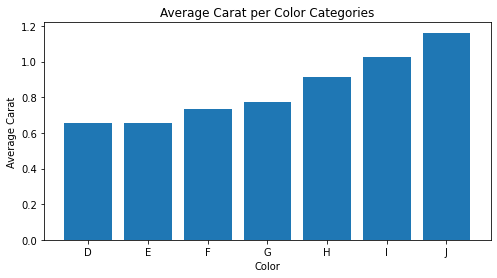

<Figure size 432x288 with 0 Axes>

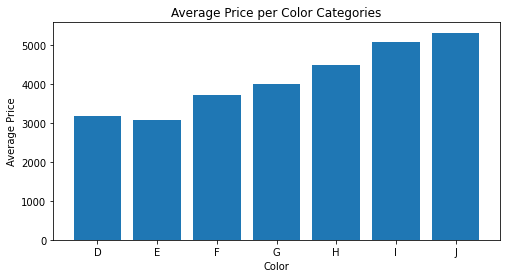

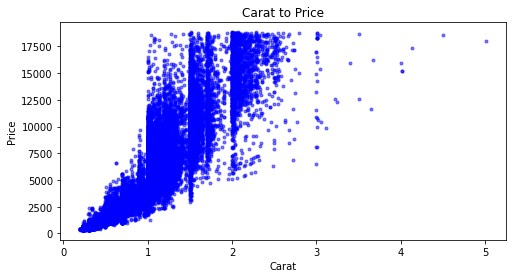

Carat to Price Correlation: 0.9215913011934772


<Figure size 432x288 with 0 Axes>

In [80]:
# store csv file as DataFrame & set Collumn 'no' as index
diamondDataFrame = pd.read_csv('diamonds.csv').set_index('No')

# menghitung rata-rata carat dari tiap warna berlian dan mengurutkannya dari yang terbaik (D) hingga terburuk (J)
colorMeanDF = diamondDataFrame.groupby('color').mean().sort_values('color', ascending=True)

plt.figure(figsize=[8,4])
plt.title('Average Carat per Color Categories')
plt.xlabel('Color')
plt.ylabel('Average Carat')
plt.bar(colorMeanDF.index, colorMeanDF['carat'])
plt.show()
plt.clf()

# plot data price per color
plt.figure(figsize=[8,4])
plt.title('Average Price per Color Categories')
plt.xlabel('Color')
plt.ylabel('Average Price')

plt.bar(colorMeanDF.index,colorMeanDF['price'])
plt.show()

# get 2 collumn (carat & price) as dataframe then sort by 'carat'
caratPriceDF = diamondDataFrame[['carat','price']].sort_values('carat')

# figure title and label
plt.figure(figsize=[8,4])
plt.title('Carat to Price')
plt.xlabel('Carat')
plt.ylabel('Price')

# plot scatter: karena data carat dan harga cukup beragam agar grafik dapat memperlihatkan keberagaman tersebut
plt.scatter(caratPriceDF['carat'], caratPriceDF['price'], c='b', alpha=0.5, marker='.')
plt.show()
plt.clf()

print('Carat to Price Correlation: ' + str(caratPriceDF['carat'].corr(caratPriceDF['price'])))

Pada 3 grafik sebelumnya kolom data yang dieksplorasi ialah kolom price, carat, dan color. Beberapa kesimpulan yang dapat diambil ialah:
- diamond dengan color yang semakin buruk secara rata-rata cenderung memiliki karat yang lebih tinggi atau berat diamond yang lebih berat.
- diamond dengan color yang semakin buruk secara rata-rata harga diamond dijual lebih tinggi dibanding dengan diamond dengan warna yang lebih bagus.
- Pada grafk Carat to Price diketahui melalui scatter plot dan fungsi corr() dari numpy bahwa kedua kolom data memiliki korelasi positif yang kuat di angka 0.92

Pada kesimpulan 1 dan 2 diduga bahwa harga rata-rata harga color tipe J (tipe terburuk) memiliki harga rata-rata yang sangat tinggi karena jumlah data berlian pada tipe J sedikit sehingga faktor pembaginya semakin kecil sehingga perhitungan rata-rata menjadi sangat tinggi.

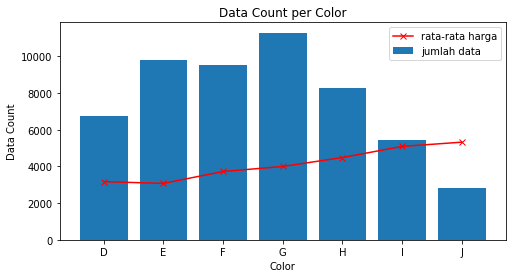

<Figure size 432x288 with 0 Axes>

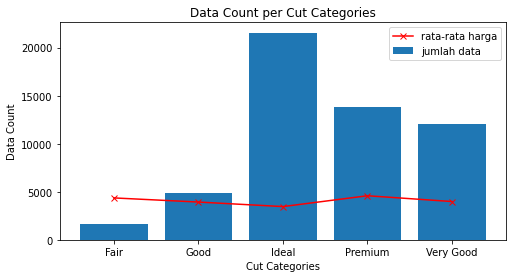

<Figure size 432x288 with 0 Axes>

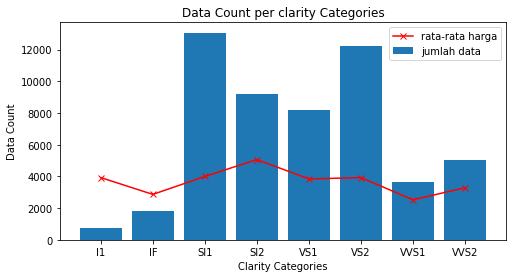

<Figure size 432x288 with 0 Axes>

In [81]:
# get 2 collumn of data: color & data count
colorDataDF = diamondDataFrame[['color','price']].sort_values('color')

# menghitung jumlah data dari tiap kategori kualitas potongan
colorDataStat = colorDataDF.groupby('color')['price'].agg(['count',np.mean])

# plot total data count for each cut categories
plt.figure(figsize=[8,4])
plt.title('Data Count per Color')
plt.xlabel('Color')
plt.ylabel('Data Count')
plt.bar(colorDataStat.index, colorDataStat['count'], label='jumlah data')
plt.plot(colorDataStat.index, colorDataStat['mean'], c='r', marker='x', label='rata-rata harga')
plt.legend(loc='best')
plt.show()
plt.clf()

#get 2 collumn (cut & price)
cutPriceDF = diamondDataFrame[['cut','price']].sort_values('cut')

# menghitung jumlah data dari tiap kategori kualitas potongan
cutPriceStat = cutPriceDF.groupby('cut')['price'].agg(['count',np.mean])

# plot total data count for each cut categories
plt.figure(figsize=[8,4])
plt.title('Data Count per Cut Categories')
plt.xlabel('Cut Categories')
plt.ylabel('Data Count')
plt.bar(cutPriceStat.index, cutPriceStat['count'], label='jumlah data')
plt.plot(cutPriceStat.index, cutPriceStat['mean'], c='r', marker='x', label='rata-rata harga')
plt.legend(loc='best')
plt.show()
plt.clf()

#get 2 collumn (cut & price)
clarityPriceDF = diamondDataFrame[['clarity','price']].sort_values('clarity')

# menghitung jumlah data dari tiap kategori kualitas potongan
clarityPriceStat = clarityPriceDF.groupby('clarity')['price'].agg(['count',np.mean])

# plot total data count for each clarity categories
plt.figure(figsize=[8,4])
plt.title('Data Count per clarity Categories')
plt.xlabel('Clarity Categories')
plt.ylabel('Data Count')
plt.bar(clarityPriceStat.index, clarityPriceStat['count'], label='jumlah data')
plt.plot(clarityPriceStat.index, clarityPriceStat['mean'], c='r', marker='x', label='rata-rata harga')
plt.legend(loc='best')
plt.show()
plt.clf()

Dapat dilihat pada grafik data count per color bahwa memang warna J (tipe terburuk) memiliki jumlah data paling sedikit sehingga hal ini mengkonfirmasi dugaan sebelumnya. Dimana harga rata-rata diamond tipe J menjadi paling tinggi lebih didominasi karena jumlah datanya yang sedikit sehingga faktor baginya semakin kecil.



In [82]:
# debug code

print(diamondDataFrame.head())
# print(diamondDataFrame.groupby('color')['price'].mean().loc['D'])
# print(diamondDataFrame.head())
# print(caratDataStat.index, caratDataStat['count'])

    carat      cut color clarity  depth  table  price     x     y     z
No                                                                     
1    0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2    0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3    0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4    0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5    0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
